In [6]:
%matplotlib inline
import numpy as np
import seaborn as sbs
import pandas as pd
from gc import collect
import matplotlib as mpl
from datetime import timedelta
import re, imp, seaborn
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from collections import Counter, defaultdict
#misc = (imp.load_source('misc', "misc.py")).misc()

http://www.jdcrow.com/Products/Cummins_Parts.htm

In [8]:
failures = pd.read_table("MachineFailuresAll.txt", skipinitialspace = True, parse_dates = [1, 5, 6],
                         infer_datetime_format = True, date_parser = pd.to_datetime).drop_duplicates()
#failures = failures[(failures.Machine.isnull() == False) & (failures.FailureDescription.isnull() == False)]
#misc.simple_counter_sort(Counter(failures[[x.year > 2012 for x in failures.InstallDate]].Machine))
failures.loc[:, 'Month'] = [x.month for x in failures.CallReceivedDate]
# failures.loc[:, 'Days'] = [pd.Timedelta(x) for x in failures.CallCloseDate - failures.CallReceivedDate]
# failures = failures[failures.Days.dt.days >= 0]

In [10]:
failures

,SNID,InstallDate,Machine,CallNumber,CallType,CallReceivedDate,CallCloseDate,PartNumber,Quantity,FailureDescription,City,ServicingBranch,State,Month
0,663254,1988-03-18,176-9000-00,E336100006,E,2014-04-10,2014-04-10,021-UPGD-00,1,Inspection,SALEM,54,NH,4
2,663254,1988-03-18,176-9000-00,E336100006,E,2014-04-10,2014-04-10,406-0106-01,4,Inspection,SALEM,54,NH,4
6,663254,1988-03-18,176-9000-00,A148078,E,2015-03-27,2015-04-03,406-0842-01,1,NaN,SALEM,54,NH,3
7,663254,1988-03-18,176-9000-00,A148078,E,2015-03-27,2015-04-03,406-0784-00,2,NaN,SALEM,54,NH,3
8,654217,1988-05-30,600-9001-00,A092787,E,2014-09-22,2014-09-24,015-0010-00,1,NaN,NORTH CHARLESTON,56,SC,9
9,654505,1988-05-31,600-9000-00,A119403,E,2014-12-19,2014-12-22,600-0194-00,1,Sensor error on quarters,PUEBLO,63,CO,12
10,654505,1988-05-31,600-9000-00,A119403,E,2014-12-19,2014-12-22,600-0214-00,1,Sensor error on quarters,PUEBLO,63,CO,12
11,654505,1988-05-31,600-9000-00,A119403,E,2014-12-19,2014-12-22,600-0188-00,1,Sensor error on quarters,PUEBLO,63,CO,12
12,654505,1988-05-31,600-9000-00,A171874,E,2015-06-08,2015-06-09,600-0126-00,1,Missorts,PUEBLO,63,CO,6
13,658611,1988-06-08,600-9001-00,E352100001,E,2014-01-22,2014-01-14,600-0500-00,1,Same,BORING,85,OR,1


In [3]:
failures.loc[:, "InstallYear"] = failures.InstallDate.dt.year

In [4]:
failures[["SNID", "InstallDate"]].drop_duplicates().groupby("SNID").count().sort_values("InstallDate", ascending = False).shape#[failures[["SNID", "InstallDate"]].drop_duplicates().groupby("SNID").count().InstallDate > 1]

(96859, 1)

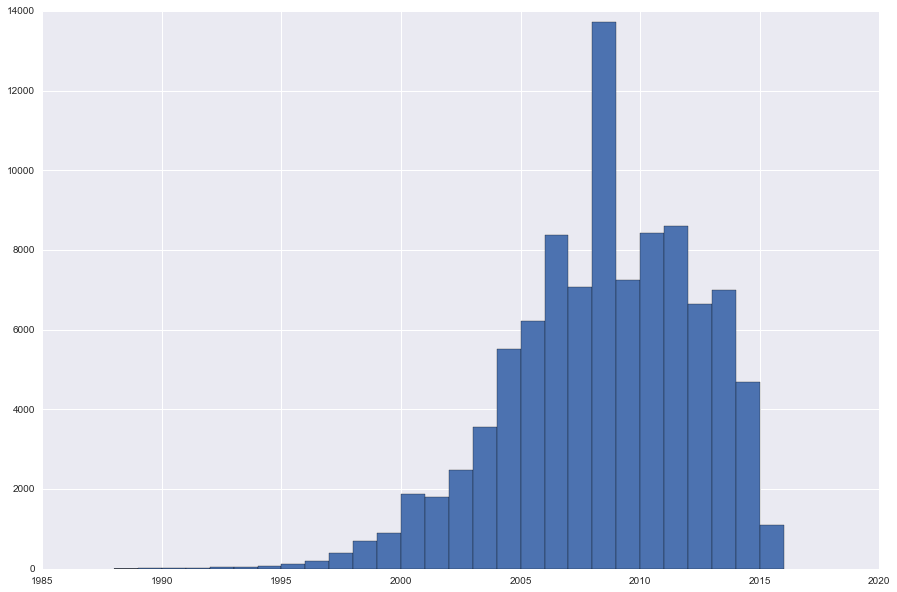

In [5]:
failures[["SNID", "InstallYear"]].drop_duplicates("SNID").InstallYear.hist(figsize = (15, 10), bins = range(1988, 2017))

In [8]:
tempt = failures[[str(x).lower().find('pm') <= -1 for x in failures.FailureDescription]]
tempt = tempt[[x.year > 2012 for x in tempt.InstallDate]][['FailureDescription', 'CallNumber']].drop_duplicates()


In [13]:
print 'Total Calls', len(tempt)
def gfc(descr):
    return len([x for x in tempt.FailureDescription
               if str(x).lower().find(descr) > -1])

Total Calls 21800


In [11]:
words = [word
         for query in tempt.FailureDescription
         for word in re.findall(r"[\w']+", str(query).lower())]

620

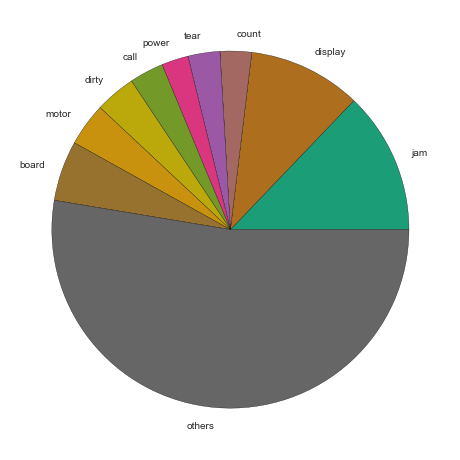

In [14]:
plt.figure(figsize = (8, 8))
_ = plt.pie([gfc('jam'), gfc('display') + gfc('screen'),
                     gfc('count'), gfc('tear') + gfc('torn'),
                     gfc('power'),
                     gfc('call'), gfc('dirty') + gfc('clean'),
                     gfc('motor'), gfc('board') + gfc('sensor'),
             len(tempt) - sum((gfc('jam'), gfc('display') + gfc('screen'),
                     gfc('count'), gfc('tear') + gfc('torn'),
                     gfc('power'),
                     gfc('call'), gfc('dirty') + gfc('clean'),
                     gfc('motor'), gfc('board') + gfc('sensor')))],
            labels = ['jam', 'display',
                      'count', 'tear',
                      'power',
                      'call', 'dirty',
                      'motor', 'board',
                      'others'],
            #shadow = True,
            colors = plt.cm.Dark2(np.linspace(0., 1., 10)))
collect()

In [19]:
tempt = failures[[x.year > 2012 for x in failures.InstallDate]].groupby('SNID')
tempt = tempt.first().drop_duplicates()
tempt.loc[:, 'CAge'] = tempt.CallReceivedDate - tempt.InstallDate
tempt = tempt[tempt.CAge.dt.days < (365. / 2.)]
print len(tempt)
print len(tempt[[str(x).lower().find('display', 0, len(str(x))) > -1
                 or str(x).lower().find('screen', 0, len(str(x))) > -1 \
                 and str(x).lower().find('jam', 0, len(str(x))) <= -1 \
                 for x in tempt.FailureDescription]])

4831
801


In [21]:
lex = defaultdict(int)
for item in list(tempt.FailureDescription):
    word_list = re.findall(r"[\w']+", str(item))
    for word in word_list:
        lex[word.lower()] += 1

In [23]:
failures[['Quantity', 'PartNumber', 'State']].pivot_table('Quantity', 'PartNumber', 'State', aggfunc=np.mean)

State,471,AK,AL,AR,AZ,CA,CO,CT,DC,DE,...,de,fl,il,in,ky,md,nj,s,va,wi
PartNumber,,,,,,,,,,,,,,,,,,,,,
005-9000-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006-0025-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006-9000-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
008-0102-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
008-0201-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
015-0006-05,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
015-0010-00,NaN,1.0,1.00,1.0,1.013636,1.043025,1.000000,1.0,1.0,2.657143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
015-0011-00,NaN,1.0,1.00,1.0,1.000000,1.000000,1.000000,1.0,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
015-0022-00,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
raw_string =''
for x in sorted(failures[failures.Machine == '620-9061-00'].InstallDate.unique()):
    if pd.Timestamp(x).year < 1994:
        raw_string += '<div style="border:1px black;background-color:red">' + str(x) + '</div>'
    else:
        raw_string += '<div style="border:1px black;background-color:gray">' + str(x) + '</div>'
HTML(raw_string)    

In [29]:
grouped = failures[[str(x).lower().find('pm') <= -1
                    for x in failures.FailureDescription]] \
[['SNID', 'Machine', 'CallNumber', 'FailureDescription']].drop_duplicates() \
.sort(['Machine', 'CallNumber']) \
[['Machine', 'CallNumber']].groupby('Machine')
g_totals = grouped.count().sort('CallNumber', ascending = False)

grouped = failures[[str(x).lower().find('pm') <= -1 and 
                    str(x).lower().find('count') > -1
                    for x in failures.FailureDescription]] \
[['SNID', 'Machine', 'CallNumber', 'FailureDescription']].drop_duplicates() \
.sort(['Machine', 'CallNumber']) \
[['Machine', 'CallNumber']].groupby('Machine')

grouped = grouped.count().sort('CallNumber', ascending = False)
grouped.loc[:, 'Total'] = [g_totals.loc[x, :].CallNumber for x in grouped.index]
grouped = grouped[grouped.Total > 20]
grouped = pd.DataFrame({ 'Pct': [int(x) for x in (grouped.CallNumber) * 100. / (grouped.Total)], 'Total': grouped.Total}).sort(['Pct', 'Total'], ascending=False)
grouped[grouped.Pct >= 8]

C:\Users\shail.deliwala\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\shail.deliwala\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\shail.deliwala\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\shail.deliwala\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\shail.deliwala\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Pct,Total
Machine,,
638-9602-01,18,32
409-U906-00,18,27
136-9000-00,13,36
636-9663-01,11,26
631-9606-HD,8,369
409-9916-99,8,203
620-9061-00,8,109
484-0010-01,8,71
484-0016-01,8,37


In [34]:
grouped = failures[[str(x).lower().find('pm') <= -1 for x in failures.FailureDescription]][['SNID', 'Machine', 'CallNumber', 'FailureDescription']].drop_duplicates() \
.sort_values(['Machine', 'CallNumber'])[['Machine', 'CallNumber']].groupby('Machine')
g_totals = grouped.count().sort_values('CallNumber', ascending = False)
grouped = failures[[str(x).lower().find('pm') <= -1 and 
                    str(x).lower().find('count') > -1
                    for x in failures.FailureDescription]] \
[['SNID', 'Machine', 'CallNumber', 'FailureDescription', 'State']].drop_duplicates() \
.sort_values(['Machine', 'CallNumber']) \
[['Machine', 'CallNumber', 'State']].pivot_table('CallNumber', 'Machine', 'State', aggfunc=len)
grouped

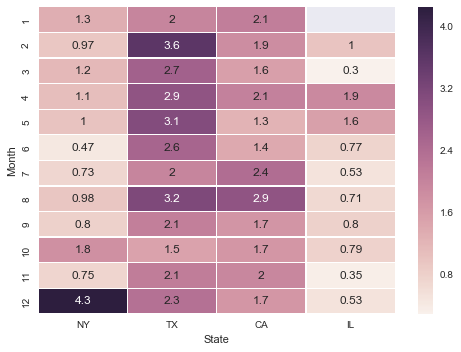

In [39]:
divs = failures[['CallNumber', 'Month', 'State']].drop_duplicates() \
.pivot_table('CallNumber', index = 'Month', columns = 'State', aggfunc = len).loc[:, ['NY', 'TX', 'CA', 'IL']]

cplot = failures[[str(x).lower().find('tear') > -1 for x in failures.FailureDescription]][['CallNumber', 'Month', 'State']] \
.drop_duplicates().pivot_table('CallNumber',
             index = 'Month',
             columns = 'State',
             aggfunc = len) \
.loc[:, ['NY', 'TX', 'CA', 'IL']]

cplot = cplot * 100. / divs
#cplot.plot(kind = 'bar', figsize = (15, 6), grid = False)
#seaborn.barplot(x = 3, data= cplot)
#HTML('<font face = "Garamond" size=4><h1>Call Related Issues</h1>' + cplot.to_html(
#        float_format = lambda x: '%10.2f' % x) + '</font>')
seaborn.heatmap(cplot, annot = True, linewidths = 0.2)

In [40]:
failures.loc[:, "Month"] = failures.CallReceivedDate.dt.month

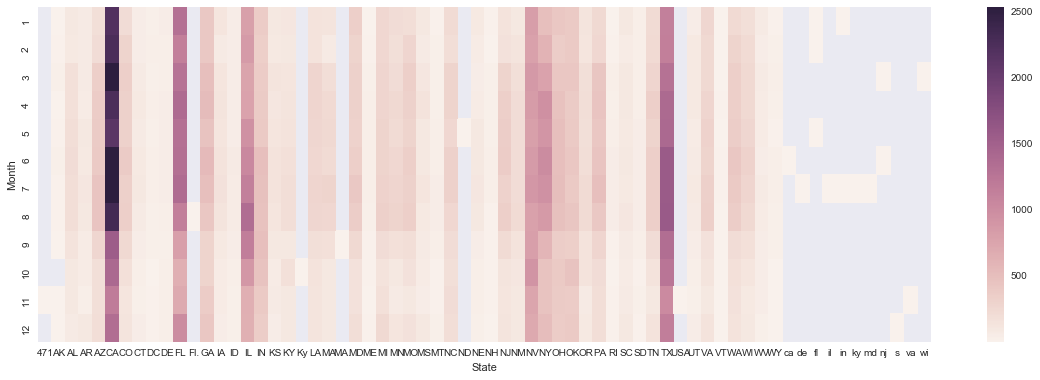

In [43]:
plt.figure(figsize = (20, 6))
sbs.heatmap(failures[["Machine", "CallNumber", "Month", "State"]].drop_duplicates(["Machine", "CallNumber"]).pivot_table("CallNumber", "Month", "State", aggfunc = len))

In [46]:
#len(tempt.DiffMin) / 366225.
print 'cal'
#273810028.7 #cal total
print 313352. * 100. / (273810028.7 / 60.) # cal time
print 426255. * 100. / (273810028.7 / 60.)
print 3307. * 100. / 723239. #cal call
print 'ny'
#65645512.7 ny total
print 153481.6 * 100. / (65645512.7 / 60.) #ny time
print 187039.9 * 100. / (65645512.7 / 60.)
print 1701. * 100. / 31678. #ny call
print 'tn'
#12681050.62 tn total
print 31666.7 * 100. / (12681050.6 / 60.)
print 34901.7 * 100. / (12681050.6 / 60.)
print 417. * 100. / 7136.
print 'az'
#27727213.4 az total
print 54925. * 100. / (27727213.4 / 60.)
print 77745. * 100. / (27727213.4 / 60.)
print 567. * 100. / 10161.

cal
6.86648333856
9.34052712438
0.457248572049
ny
14.0282185655
17.0954472567
5.36965717533
tn
14.9830014873
16.5136317649
5.84360986547
az
11.885435267
16.8235441936
5.58015943313


In [50]:
subset = failures[[x.year > 2012 for x in failures.InstallDate]].drop_duplicates()
subset = subset[subset.Machine == '406-9902-00']
subset = subset[[str(x).lower().find('pm') <= -1 for x in subset.FailureDescription]]
subset.drop('Machine', 1, inplace = True)
subset.loc[:, 'CAge'] = [pd.Timedelta(x) for x in subset.CallReceivedDate - subset.InstallDate]
subset = subset[subset.CAge.dt.days > 0]
subset.index = range(0, len(subset))

In [51]:
grouped = subset.groupby('SNID')

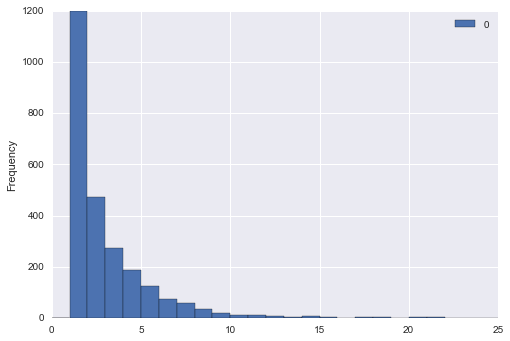

In [52]:
_ = pd.DataFrame([len(x) for x in grouped.groups.values()]).plot(kind = 'hist', bins = range(0, 26, 1))

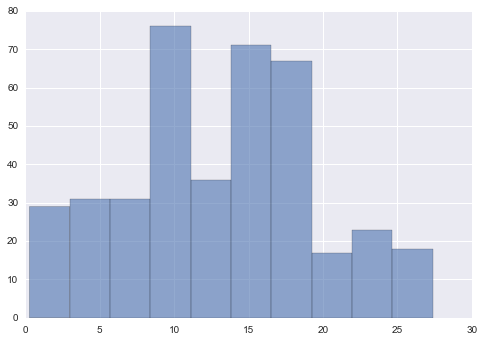

In [53]:
_ = plt.hist([float(x) for x in subset[subset.SNID.isin([x for x in subset.SNID if len(subset[subset.SNID == x]) == 7])].CAge.dt.days / 30.],
         alpha = 0.6)

Month    1     2     3     4     5     6     7     8     9     10    11    12
State                                                                        
NY      2.0  11.0   8.0  20.0  14.0  23.0  18.0  13.0  15.0   8.0   4.0   5.0
CA     23.0  22.0  33.0  16.0  13.0  29.0  23.0  18.0  13.0   8.0   8.0  17.0
FL     32.0  30.0  40.0  40.0  24.0  37.0  42.0  30.0  19.0  22.0  23.0  23.0
TX     19.0  13.0  24.0  14.0  15.0  25.0  22.0  22.0  19.0  17.0   8.0   9.0
OH      9.0  10.0  14.0  14.0  10.0  18.0  17.0  17.0   5.0   6.0   9.0  10.0


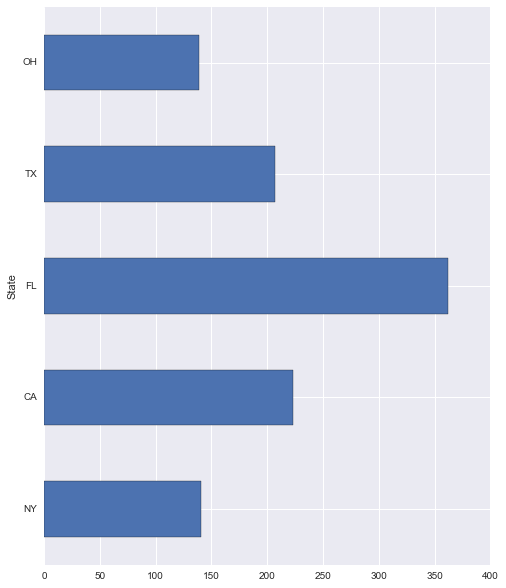

In [56]:
g_monthly = subset[['Month', 'CallNumber', 'State']].drop_duplicates()
g_monthly = g_monthly.pivot_table('CallNumber', 'State', 'Month', aggfunc=len) \
.loc[('NY', 'CA', 'FL', 'TX', 'OH'), :]
print g_monthly
g_monthly = g_monthly.sum(axis = 1) # / g_monthly.sum().sum()
g_monthly.sort_values(ascending = False)
g_monthly.plot(kind='barh', figsize=(8, 10))


In [57]:
[x for x in subset.groupby(['SNID', 'CallNumber']).head(1) \
    .CAge.dt.days.describe(percentiles = [x / 100. for x in range(0, 100, 5)])[4:] / 30.]

[0.033333333333333333,
 1.4633333333333336,
 2.5666666666666669,
 3.8899999999999997,
 4.8666666666666663,
 5.9333333333333336,
 7.046666666666666,
 8.0766666666666644,
 9.3000000000000007,
 10.5,
 11.733333333333333,
 13.033333333333333,
 14.033333333333333,
 15.133333333333333,
 16.533333333333335,
 17.933333333333334,
 19.5,
 20.876666666666658,
 22.673333333333343,
 26.0,
 32.666666666666664]

C:\Users\shail.deliwala\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


(array([ 225.,  236.,  271.,  267.,  225.,  207.,  196.,  192.,  157.,
         156.,  125.,   68.,   72.,   48.,   33.,   17.,    2.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34]),
 <a list of 17 Patch objects>)

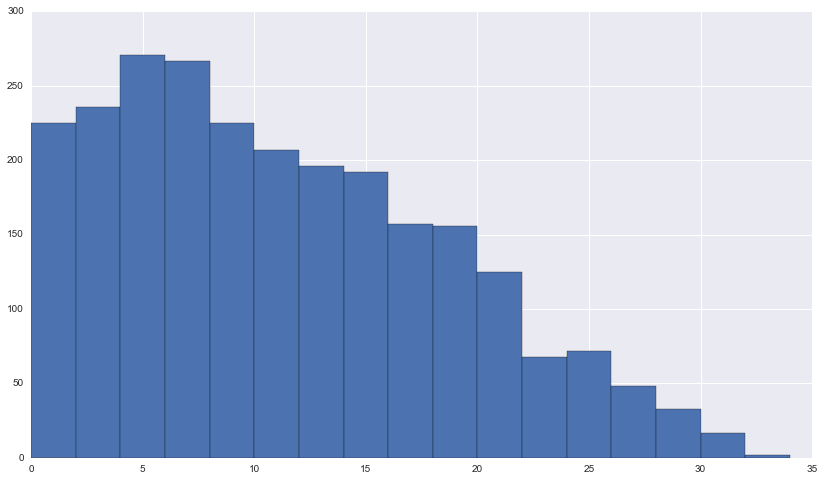

In [58]:
grouped = (subset.sort(['SNID', 'CAge'])[['SNID', 'CAge', 'PartNumber']]).groupby('SNID')

plt.figure(figsize=(14, 8))
plt.hist([float(x) for x in grouped.first()['CAge'].dt.days / 30.], bins=range(0, 35, 2))


In [59]:

[str(x) for x in subset.groupby(['SNID', 'CallNumber']).head(1) \
    .CAge.dt.days.describe(percentiles = [x / 100. for x in range(0, 100, 5)])[4:] / 12.]
    #.filter(lambda x: len(x) > 3) \
    #.groupby(['SNID', 'CallNumber']) 
    
#misc.simple_counter_sort(Counter())
#pd.DataFrame(misc.simple_counter_sort(Counter(nth.PartNumber)))
#pd.DataFrame(misc.simple_counter_sort(Counter(nth[nth.CAge.dt.days < 200].PartNumber))) #.plot(kind='barh', figsize = (16, 6))

['0.0833333333333',
 '3.65833333333',
 '6.41666666667',
 '9.725',
 '12.1666666667',
 '14.8333333333',
 '17.6166666667',
 '20.1916666667',
 '23.25',
 '26.25',
 '29.3333333333',
 '32.5833333333',
 '35.0833333333',
 '37.8333333333',
 '41.3333333333',
 '44.8333333333',
 '48.75',
 '52.1916666667',
 '56.6833333333',
 '65.0',
 '81.6666666667']

In [61]:
tempt = subset.groupby(['SNID']).first().drop_duplicates()
tempt = tempt[tempt.CAge.dt.days < (365. / 2.)]
print len(tempt)
print len(tempt[[str(x).lower().find('call') > -1
                 and str(x).lower().find('display') <= -1 \
                 and str(x).lower().find('jam') <= -1 \
                   for x in tempt.FailureDescription]])

740
23


In [63]:
(269 + 191) / 3214.
(128 + 94) / 864.

0.2569444444444444

In [66]:
sorted(lex.items(), key = lambda x: x[1], reverse = True)

[('upgrade', 9),
 ('needs', 4),
 ('update', 4),
 ('ring', 3),
 ('100', 3),
 ('o', 3),
 ('software', 3),
 ('density', 2),
 ('no', 2),
 ('maintenance', 2),
 ('retard', 2),
 ('off', 2),
 ('preventive', 2),
 ('and', 1),
 ('jamming', 1),
 ('maint', 1),
 ('cd', 1),
 ('tires', 1),
 ('in', 1),
 ('need', 1),
 ('still', 1),
 ('ripping', 1),
 ('out', 1),
 ('one', 1),
 ('range', 1),
 ('tight', 1),
 ('lower', 1),
 ('call', 1),
 ('too', 1),
 ('new', 1),
 ('mis', 1),
 ('reading', 1),
 ('100s', 1),
 ('adjusting', 1),
 ('tension', 1),
 ('to', 1),
 ('missing', 1),
 ('dd', 1),
 ('were', 1),
 ('glass', 1),
 ('of', 1),
 ('was', 1),
 ('not', 1),
 ('removed', 1),
 ('needed', 1),
 ('roller', 1),
 ('count', 1),
 ('jams', 1),
 ('windows', 1),
 ('latches', 1),
 ('inoperable', 1),
 ('urh', 1),
 ('bad', 1),
 ('error', 1),
 ('release', 1),
 ('bills', 1),
 ('rollers', 1),
 ('transport', 1)]

In [65]:
subset.groupby(['SNID', 'CallNumber']) \
    .filter(lambda x: len(x) > 3) \
    .FailureDescription
    #.groupby(['SNID', 'CallNumber']).head(1) \

19              Stacker not clearing during strap counts.
20              Stacker not clearing during strap counts.
21              Stacker not clearing during strap counts.
22              Stacker not clearing during strap counts.
23              Stacker not clearing during strap counts.
24              Stacker not clearing during strap counts.
30                                         Running poorly
31                                         Running poorly
32                                         Running poorly
33                                         Running poorly
56                                        Feed too loose.
57                                        Feed too loose.
58                                        Feed too loose.
59                                        Feed too loose.
66                                  O rings streached out
67                                  O rings streached out
68                                  O rings streached out
69            